# --- 데이터 전처리 ---

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# 폰트깨짐 현상 해결
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [62]:
# 원래 데이터 불러오기
df=pd.read_csv('data.csv')

In [63]:
df.shape

(24697792, 12)

In [64]:
# 서울 지역에 위치한 상점 정보만 분석
df_seoul = df[df['CARD_SIDO_NM'].str.contains('서울')]

In [65]:
df_seoul.reset_index(drop=True, inplace=True)

In [66]:
df_seoul.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,5,7,1181300,8
1,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,4,3,756000,4
2,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,4,6,2480710,14
3,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,5,6,3604450,7
4,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,4,4,1952750,11


In [67]:
# 약 625만개 데이터
df_seoul.shape

(6259502, 12)

In [68]:
df_seoul.info()
# REG_YYMM -> datetime()으로 바꿀 필요가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 573.1+ MB


In [69]:
df_seoul.isnull().sum()
# null값 파악
# HOM_CCG_NM의 null값이 뭔지 파악

REG_YYMM            0
CARD_SIDO_NM        0
CARD_CCG_NM         0
STD_CLSS_NM         0
HOM_SIDO_NM         0
HOM_CCG_NM      28533
AGE                 0
SEX_CTGO_CD         0
FLC                 0
CSTMR_CNT           0
AMT                 0
CNT                 0
dtype: int64

In [70]:
df_seoul[df_seoul['HOM_SIDO_NM'].str.contains('세종')].head()
# null값 28533개 모두 HOM_SIDO_NM가 세종인 곳에 있음

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
254,201901,서울,강남구,건강보조식품 소매업,세종,NaN,50s,1,4,3,1349000,3
255,201901,서울,강남구,건강보조식품 소매업,세종,NaN,50s,2,4,3,1103800,6
877,201901,서울,강남구,그외 기타 종합 소매업,세종,NaN,30s,1,2,5,450000,5
878,201901,서울,강남구,그외 기타 종합 소매업,세종,NaN,30s,2,2,5,2250000,5
879,201901,서울,강남구,그외 기타 종합 소매업,세종,NaN,40s,1,3,10,2985000,14


In [71]:
df_seoul = df_seoul.fillna('세종시')
# HOM_CCG_NM를 세종시로 채워 null값 대체

In [72]:
df_seoul[df_seoul['HOM_SIDO_NM'].str.contains('세종')].head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
254,201901,서울,강남구,건강보조식품 소매업,세종,세종시,50s,1,4,3,1349000,3
255,201901,서울,강남구,건강보조식품 소매업,세종,세종시,50s,2,4,3,1103800,6
877,201901,서울,강남구,그외 기타 종합 소매업,세종,세종시,30s,1,2,5,450000,5
878,201901,서울,강남구,그외 기타 종합 소매업,세종,세종시,30s,2,2,5,2250000,5
879,201901,서울,강남구,그외 기타 종합 소매업,세종,세종시,40s,1,3,10,2985000,14


In [73]:
df_seoul.isnull().sum()
# 다시 한번 null 값 확인 -> null 값 없음을 확인

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

In [74]:
df_seoul['REG_YYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003])

In [75]:
df_seoul['CARD_CCG_NM'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [76]:
df_seoul['STD_CLSS_NM'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '면세점', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업',
       '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업',
       '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업',
       '화장품 및 방향제 소매업', '기타 수상오락 서비스업', '내항 여객 운송업', '버스 운송업', '택시 운송업'],
      dtype=object)

In [77]:
df_seoul['HOM_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전북', '제주', '충남', '충북', '전남'], dtype=object)

In [78]:
df_seoul['HOM_CCG_NM'].unique()

array(['강릉시', '속초시', '원주시', '춘천시', '고양시 덕양구', '고양시 일산동구', '광명시', '광주시',
       '군포시', '김포시', '남양주시', '부천시', '성남시 분당구', '성남시 중원구', '수원시 권선구',
       '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구',
       '안양시 동안구', '안양시 만안구', '양평군', '오산시', '용인시 기흥구', '용인시 수지구',
       '용인시 처인구', '의왕시', '의정부시', '파주시', '평택시', '포천시', '하남시', '화성시', '거제시',
       '김해시', '양산시', '진주시', '창원시 의창구', '구미시', '포항시 남구', '남구', '북구', '달서구',
       '동구', '서구', '수성구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구',
       '사상구', '사하구', '수영구', '연제구', '영도구', '해운대구', '강남구', '강동구', '관악구',
       '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중랑구', '세종시', '울주군',
       '중구', '계양구', '남동구', '부평구', '연수구', '군산시', '전주시 완산구', '제주시',
       '천안시 동남구', '충주시', '구리시', '강북구', '도봉구', '고흥군', '광양시', '순천시', '여수시',
       '서귀포시', '성남시 수정구', '성북구', '무안군', '고양시 일산서구', '경산시', '포항시 북구',
       '광산구', '전주시 덕진구', '아산시', '청주시 상당구', '양주시', '경주시', '금천구', '천안시 서북구',
       '

In [79]:
df_seoul['AGE'].unique()

array(['60s', '50s', '30s', '40s', '70s', '20s', '10s'], dtype=object)

In [80]:
df_seoul['SEX_CTGO_CD'].unique()

array([2, 1])

In [81]:
df_seoul['FLC'].unique()

array([5, 4, 2, 3, 1])

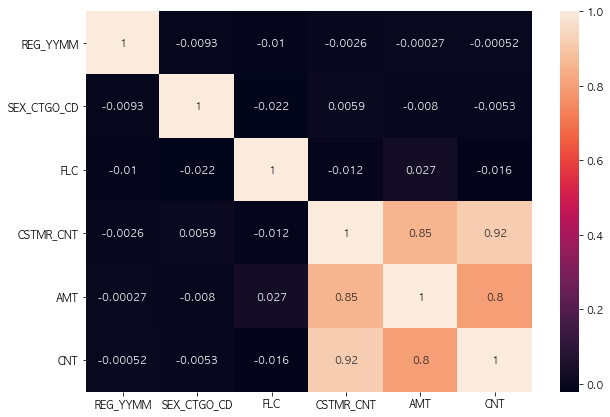

In [82]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df_seoul.corr(method='pearson'), annot = True, ax=ax)
# 상관관계를 봤는데 dtype이 str인 column들도 파악하기 위해 LabelEncoding 진행 후 다시 시각화

In [21]:
# 데이터 copy()
df_seoul_copy = df_seoul.copy()

In [22]:
# CARD_SIDO_NM는 '서울' 밖에 없기 때문에 라벨 인코딩 변환해도 의미가 없기 때문에 삭제 후 진행
df_seoul_copy.drop(['CARD_SIDO_NM'], axis=1, inplace=True)

In [23]:
# copy한 데이터 dtypes 확인한 후 라벨 인코딩을 통해 str -> int로 변환하여 상관관계 분석
df_seoul_copy.dtypes

REG_YYMM        int64
CARD_CCG_NM    object
STD_CLSS_NM    object
HOM_SIDO_NM    object
HOM_CCG_NM     object
AGE            object
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
dtype: object

In [24]:
# 라벨 인코딩
encoders = {}
for column in df_seoul_copy.columns:
    if str(df_seoul_copy.dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_seoul_copy[column])
        encoders[column] = encoder

In [25]:
for column in encoders.keys():
    encoder = encoders[column]
    df_seoul_copy[column] = encoder.transform(df_seoul_copy[column])

In [26]:
df_seoul_copy.dtypes
# 데이터 타입이 바뀐 것을 알 수 있음

REG_YYMM       int64
CARD_CCG_NM    int64
STD_CLSS_NM    int64
HOM_SIDO_NM    int64
HOM_CCG_NM     int64
AGE            int64
SEX_CTGO_CD    int64
FLC            int64
CSTMR_CNT      int64
AMT            int64
CNT            int64
dtype: object

In [27]:
df_seoul_copy.tail()
# 라벨 인코딩이 된 것을 확인

,REG_YYMM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
6259497,202003,24,38,11,89,3,2,3,3,25800,3
6259498,202003,24,38,11,89,4,1,4,9,231700,10
6259499,202003,24,38,11,89,4,2,4,16,288700,17
6259500,202003,24,38,11,89,5,1,5,6,69600,6
6259501,202003,24,38,11,89,5,2,5,8,259300,13


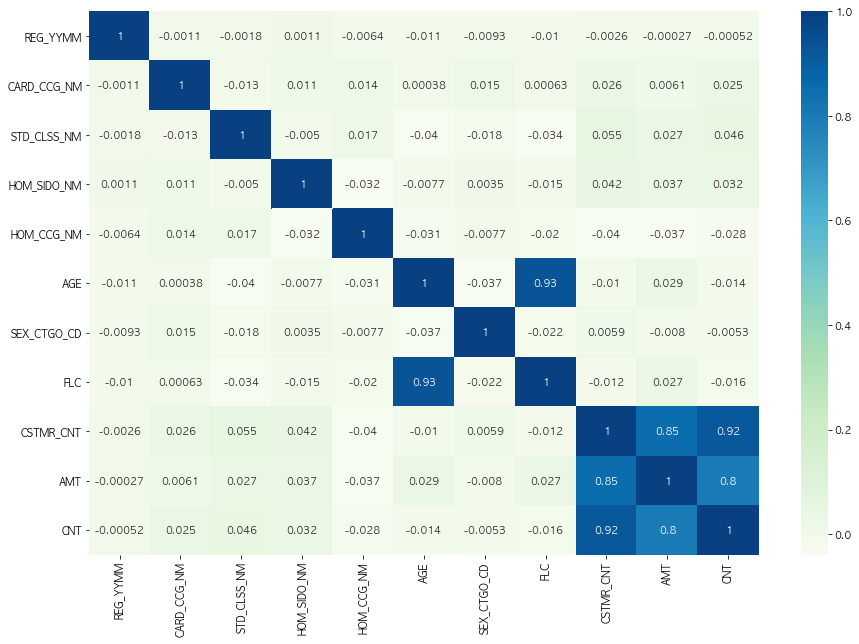

In [28]:
# 피어슨 상관관계 확인
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_seoul_copy.corr(method='pearson'), annot = True, cmap='GnBu', ax=ax)

### FLC(가족생애주기)와 AGE(연령대) / AMT(총액)와 CSTMR_CNT(이용고객수) / CSTMR_CNT(이용고객수)와 CNT(이용건수) / CNT(이용건수)와 AMT(총액)이 높은 양의 상관관계를 가진다고 보인다. 따라서 분석목적에 좀 더 적합한 AGE와 AMT만 남기고 FLC와 CSTMR_CNT와 CNT는 제거한다.

In [30]:
df_seoul_copy_ = df_seoul_copy.drop(['FLC','CSTMR_CNT','CNT'], axis=1)

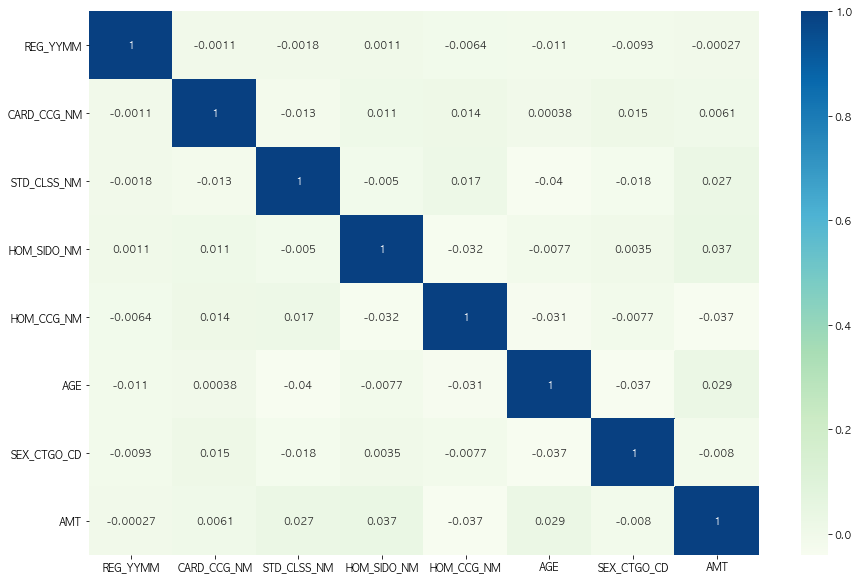

In [31]:
# 피어슨 상관관계 확인
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_seoul_copy_.corr(method='pearson'), annot = True, cmap='GnBu', ax=ax)

### 독립변수끼리 영향을 받지 않는 것을 확인할 수 있다.

In [83]:
df_seoul.drop(['FLC','CSTMR_CNT','CNT'], axis=1, inplace=True)

In [85]:
df_seoul.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,AMT
0,201901,서울,강남구,건강보조식품 소매업,강원,강릉시,60s,2,1181300
1,201901,서울,강남구,건강보조식품 소매업,강원,속초시,50s,2,756000
2,201901,서울,강남구,건강보조식품 소매업,강원,원주시,50s,2,2480710
3,201901,서울,강남구,건강보조식품 소매업,강원,원주시,60s,2,3604450
4,201901,서울,강남구,건강보조식품 소매업,강원,춘천시,50s,2,1952750


In [86]:
df_seoul["DATE"] = pd.to_datetime(df_seoul["REG_YYMM"],format='%Y%m')
# 시계열 데이터를 보기 위해 년월을 datetime으로 변환

In [87]:
# dtype이 datetime인 새로운 파생변수 'DATE' 컬럼 확인
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   REG_YYMM      int64         
 1   CARD_SIDO_NM  object        
 2   CARD_CCG_NM   object        
 3   STD_CLSS_NM   object        
 4   HOM_SIDO_NM   object        
 5   HOM_CCG_NM    object        
 6   AGE           object        
 7   SEX_CTGO_CD   int64         
 8   AMT           int64         
 9   DATE          datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 477.6+ MB


In [88]:
# 서울지역만 분석하기 떄문에 삭제
df_seoul.drop(['CARD_SIDO_NM'], axis=1, inplace=True)

In [89]:
# 원활한 분석을 위해 성별 (1: 남성, 2: 여성) -> 남성 : M, 여성 : F로 변경
# 추후 머신러닝 직전에 원핫인코딩 가능
df_seoul['SEX_CTGO_CD'] = df_seoul['SEX_CTGO_CD'].replace(1,'M').replace(2,'F')

In [90]:
# 분석시 편의를 위해 한글로 칼럼명 변경
df_seoul.rename(columns={'REG_YYMM' : '년월', 'CARD_CCG_NM' : '카드이용지역','STD_CLSS_NM' : '업종명',
                         'HOM_SIDO_NM' : '거주지역_시도', 'HOM_CCG_NM' : '거주지역_시군구', 'AMT' : '이용금액_원',
                         'AGE' : '연령대', 'SEX_CTGO_CD' : '성별', 'DATE' : '날짜'}, inplace=True)

In [91]:
df_seoul

,년월,카드이용지역,업종명,거주지역_시도,거주지역_시군구,연령대,성별,이용금액_원,날짜
0,201901,강남구,건강보조식품 소매업,강원,강릉시,60s,F,1181300,2019-01-01
1,201901,강남구,건강보조식품 소매업,강원,속초시,50s,F,756000,2019-01-01
2,201901,강남구,건강보조식품 소매업,강원,원주시,50s,F,2480710,2019-01-01
3,201901,강남구,건강보조식품 소매업,강원,원주시,60s,F,3604450,2019-01-01
4,201901,강남구,건강보조식품 소매업,강원,춘천시,50s,F,1952750,2019-01-01
...,...,...,...,...,...,...,...,...,...
6259497,202003,중랑구,화장품 및 방향제 소매업,인천,서구,40s,F,25800,2020-03-01
6259498,202003,중랑구,화장품 및 방향제 소매업,인천,서구,50s,M,231700,2020-03-01
6259499,202003,중랑구,화장품 및 방향제 소매업,인천,서구,50s,F,288700,2020-03-01
6259500,202003,중랑구,화장품 및 방향제 소매업,인천,서구,60s,M,69600,2020-03-01


In [ ]:
# 1 -> 서울사람이 서울에서 소비했을때
# 0 -> 타지역사람이 서울에서 소비했을때
a = []
for i in range(len(df_seoul)):
    if df_seoul['카드이용지역'][i] == df_seoul['거주지역_시군구'][i]:
        a.append(1)
    else: a.append(0)
df_seoul['외부인의_결제여부'] = a

In [95]:
df_seoul

,년월,카드이용지역,업종명,거주지역_시도,거주지역_시군구,연령대,성별,이용금액_원,날짜,외부인의_결제여부
0,201901,강남구,건강보조식품 소매업,강원,강릉시,60s,F,1181300,2019-01-01,0
1,201901,강남구,건강보조식품 소매업,강원,속초시,50s,F,756000,2019-01-01,0
2,201901,강남구,건강보조식품 소매업,강원,원주시,50s,F,2480710,2019-01-01,0
3,201901,강남구,건강보조식품 소매업,강원,원주시,60s,F,3604450,2019-01-01,0
4,201901,강남구,건강보조식품 소매업,강원,춘천시,50s,F,1952750,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...
6259497,202003,중랑구,화장품 및 방향제 소매업,인천,서구,40s,F,25800,2020-03-01,0
6259498,202003,중랑구,화장품 및 방향제 소매업,인천,서구,50s,M,231700,2020-03-01,0
6259499,202003,중랑구,화장품 및 방향제 소매업,인천,서구,50s,F,288700,2020-03-01,0
6259500,202003,중랑구,화장품 및 방향제 소매업,인천,서구,60s,M,69600,2020-03-01,0


In [96]:
df_seoul.to_csv('preprocessing_final.csv', index=False)